# Class distributions

In [139]:
dataset = 'MoNA'
class_column = 'superclass_id'
class_name = 'superclass'
other_columns = [class_name]

In [140]:
import sys
import numpy as np
import pandas as pd
import specvae.utils as utils

In [141]:
def get_class_counts(df, class_column):
    class_counts = df.groupby([class_column] + other_columns).size()
    class_counts_df = class_counts.reset_index(name='counts')
    return class_counts_df

In [142]:
data_path = utils.get_project_path() / '.data' / dataset / ('%s_full.csv' % dataset)
df = pd.read_csv(data_path)[[class_column, 'split'] + other_columns]
train_df = df.loc[df['split'] == 'train']
valid_df = df.loc[df['split'] == 'valid']
test_df = df.loc[df['split'] == 'test']

## Train-Test-Valid Split

In [143]:
n, n_train, n_valid, n_test = df.shape[0], train_df.shape[0], valid_df.shape[0], test_df.shape[0]
n_train, n_valid, n_test

(109163, 4988, 11680)

In [144]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Pie(labels=['train', 'valid', 'test'], values=[n_train, n_valid, n_test])])
fig.update_layout(autosize=False, width=800, height=800)
fig.show()

In [145]:
r_train, r_valid, r_test = n_train/n, n_valid/n, n_test/n
r_train, r_valid, r_test

(0.8675366165730225, 0.03964047015441346, 0.09282291327256399)

In [146]:
# df = df.dropna(subset=[class_column])
# df = df[df[class_column] > 0]
# df

In [147]:
# import seaborn as sns
# from matplotlib.cm import get_cmap

# fig, ax = plt.subplots(figsize=(7, 7), dpi=300)
# cmap = get_cmap('Blues_r')
# sns.histplot(data=df, x=class_column, bins=50, stat="percent", color='blue', alpha=0.6, edgecolor="white")
# plt.legend()
# plt.savefig(f'../.img/dist_{class_name}.svg')
# plt.show()

## Dataset

In [148]:
unique_classes_all = df[class_column].unique()
unique_classes_all, unique_classes_all.shape[0]

(array([18,  6,  1, 14, 12, 10,  7,  5, 11,  9,  0,  3, 13,  4,  2, 17, 16,
         8, 15], dtype=int64),
 19)

In [149]:
pd.set_option('display.max_rows', 500)
class_counts_df = get_class_counts(df, class_column)
# class_counts_df[class_counts_df['counts'] >= 100]
# class_counts_df

In [150]:
# import plotly.express as px
# fig = px.bar(class_counts_df, x=class_column, y='counts', hover_data=other_columns, height=500)
# fig.show()

In [151]:
def plot_pie_chart(df, values, names):
    fig = px.pie(df, values=values, names=names, hover_data=other_columns, height=500)
    fig.update_traces(textposition='inside', textinfo='percent+label')
    fig.show()

In [152]:
# plot_pie_chart(class_counts_df, 'counts', class_column)

In [153]:
plot_df = class_counts_df.sort_values(by=['counts'], ascending=False).head(15)
# plot_df = class_counts_df[class_counts_df[class_column].isin([6, 18, 14, 1, 10, 12, 0, 7, 5])].sort_values(by=['counts'], ascending=False)
# plot_df = class_counts_df[class_counts_df[class_name].isin(["positive", "negative"])].sort_values(by=['counts'], ascending=False)
plot_df

,superclass_id,superclass,counts
6,6,Lipids and lipid-like molecules,30462
18,18,Phenylpropanoids and polyketides,26775
14,14,Organoheterocyclic compounds,19269
1,1,Benzenoids,16137
10,10,Organic acids and derivatives,12012
12,12,Organic oxygen compounds,9480
0,0,Alkaloids and derivatives,5275
7,7,"Nucleosides, nucleotides, and analogues",2121
5,5,"Lignans, neolignans and related compounds",1946
11,11,Organic nitrogen compounds,1550


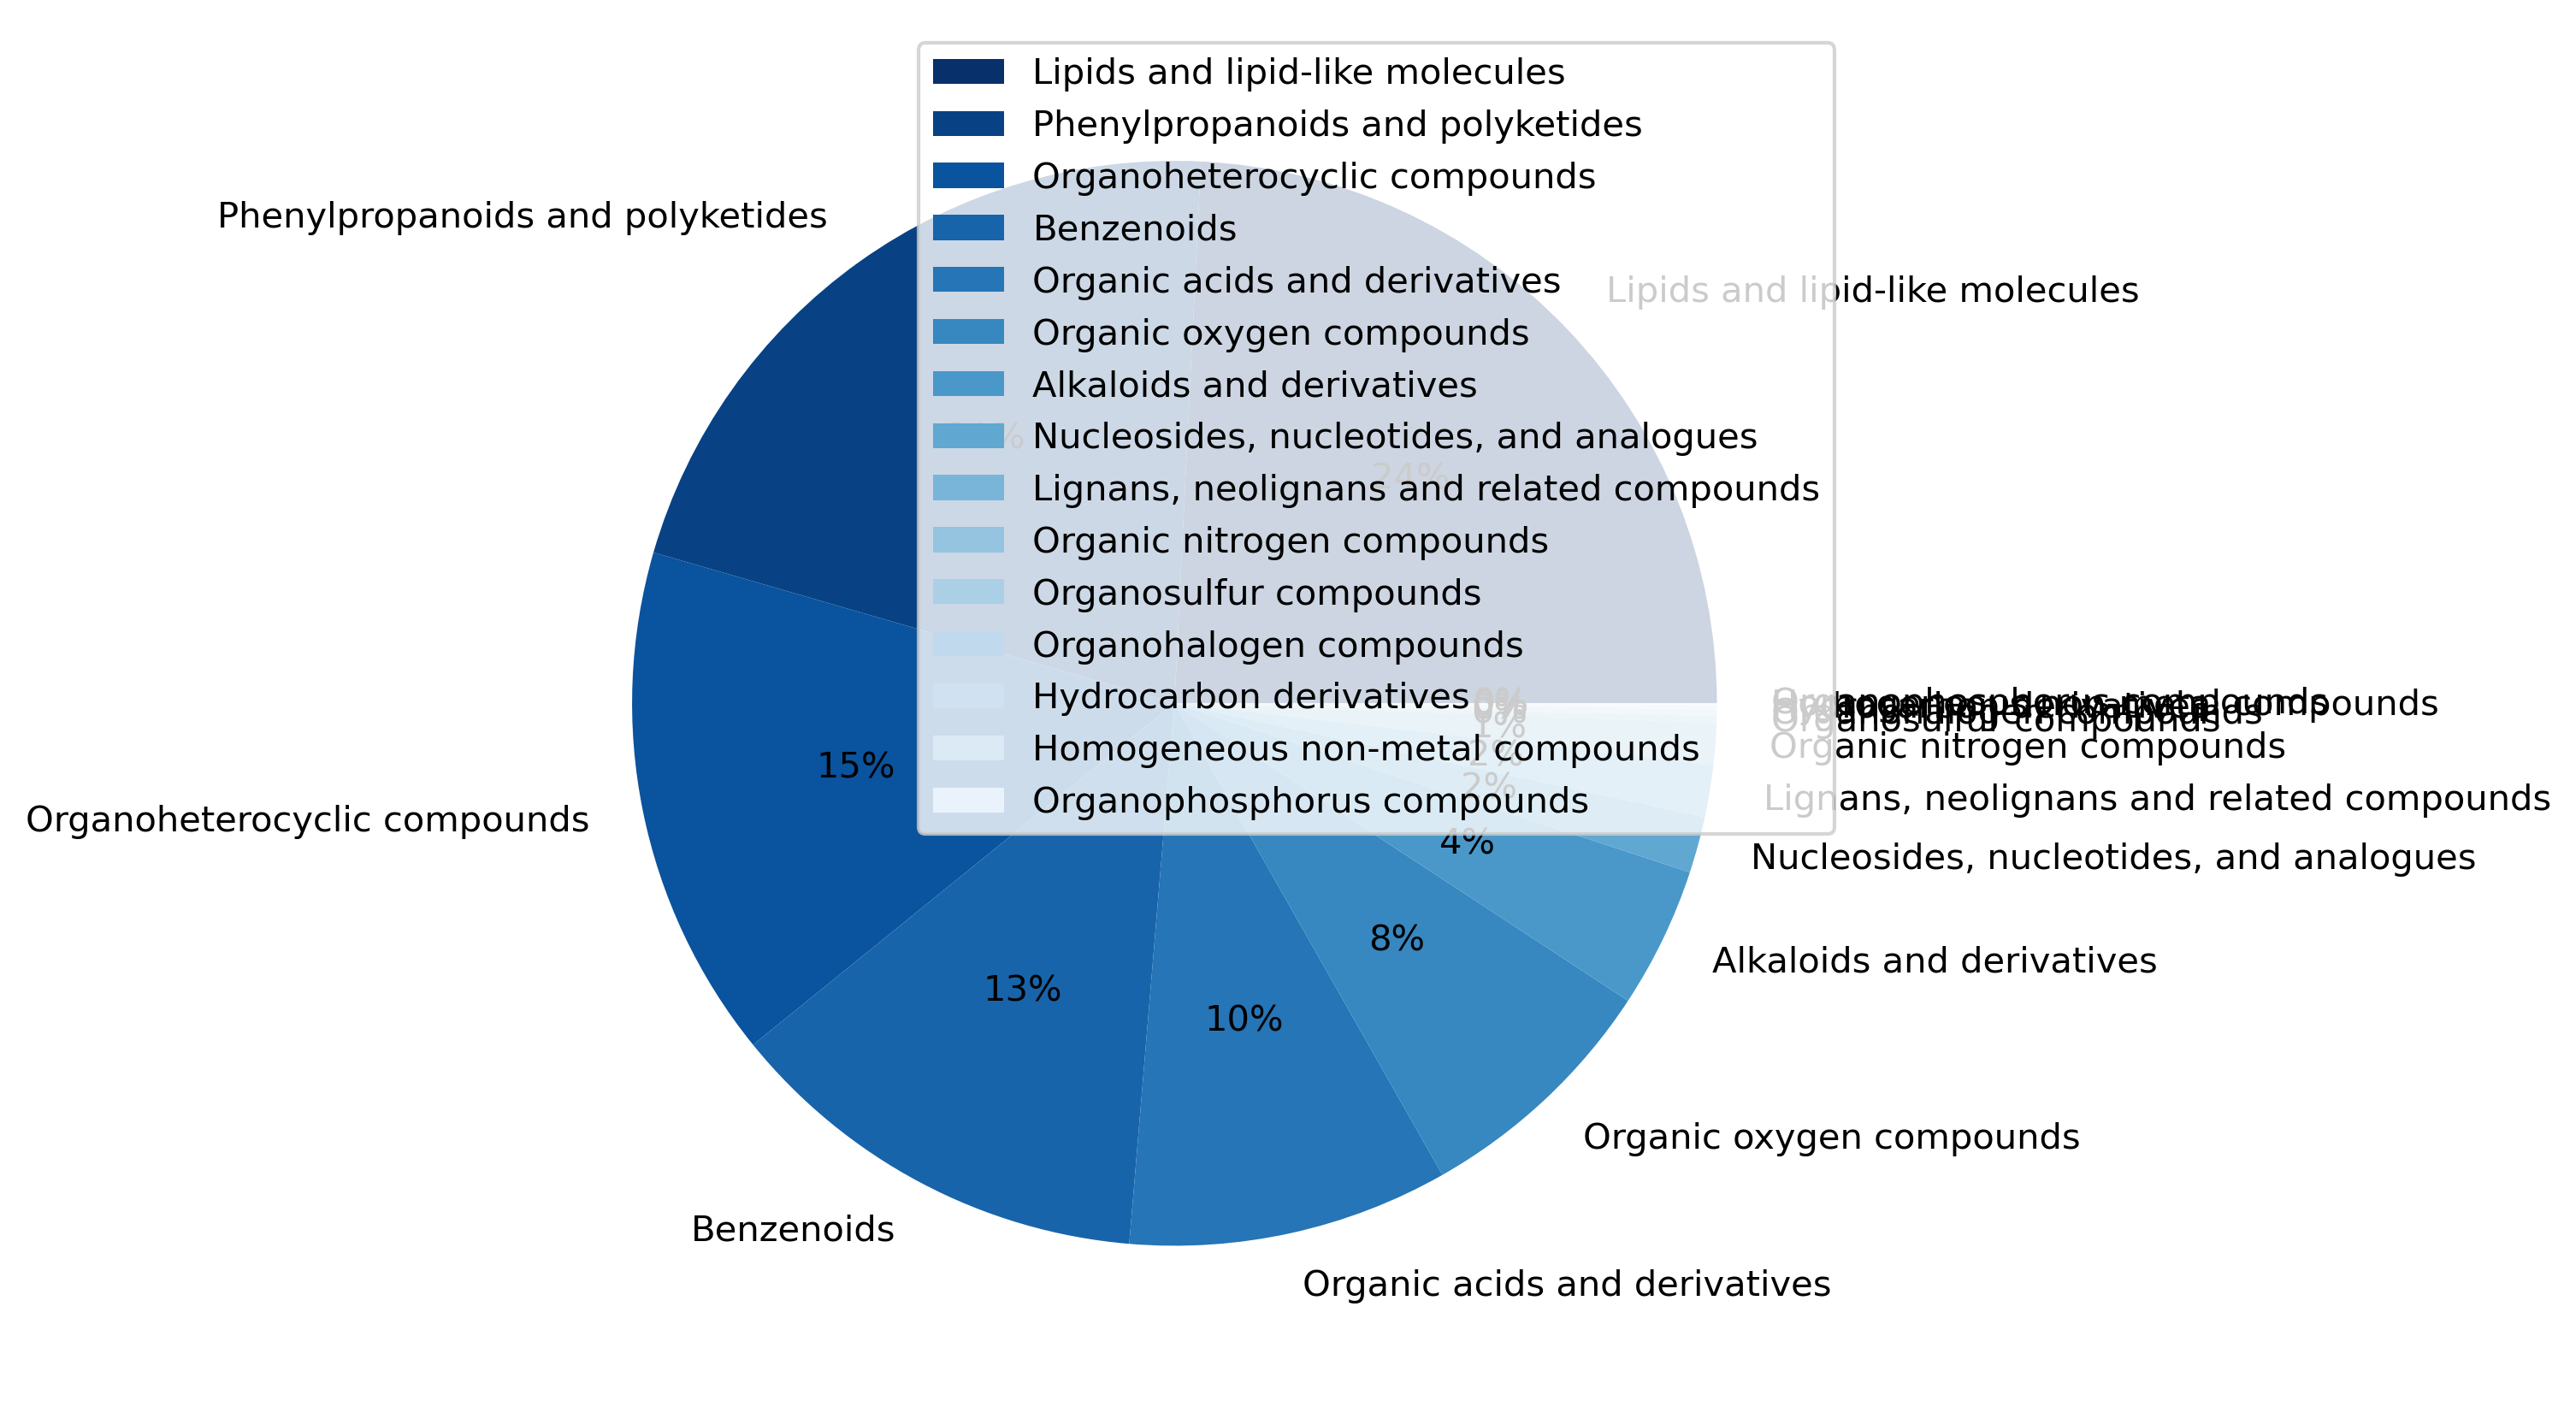

In [154]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.cm import get_cmap

values = plot_df['counts'].to_list()
labels = plot_df[class_name].to_list()

fig, ax = plt.subplots(figsize=(7, 7), dpi=300)
cmap = get_cmap('Blues_r')
N = len(values)
step = 1. / N
colors = [cmap(i * step) for i in range(N)]
ax.pie(values, labels=labels, colors=colors, autopct='%.0f%%')
plt.legend()
plt.savefig(f'../.img/dist_{class_name}.svg')
plt.show()

## Train subset

In [155]:
unique_classes = train_df[class_column].unique()
unique_classes, unique_classes.shape[0]

(array([18,  6,  1, 14, 12, 10,  7,  5, 11,  0,  3, 13,  9,  4,  2, 17, 16,
         8, 15], dtype=int64),
 19)

In [156]:
class_counts_df = get_class_counts(train_df, class_column)
class_counts_df

,superclass_id,superclass,counts
0,0,Alkaloids and derivatives,4883
1,1,Benzenoids,11498
2,2,Homogeneous non-metal compounds,45
3,3,Hydrocarbon derivatives,139
4,4,Hydrocarbons,22
5,5,"Lignans, neolignans and related compounds",1742
6,6,Lipids and lipid-like molecules,27854
7,7,"Nucleosides, nucleotides, and analogues",1988
8,8,"Organic 1,3-dipolar compounds",16
9,9,Organic Polymers,35


In [157]:
fig = px.bar(class_counts_df, x=class_column, y='counts', hover_data=other_columns, height=500)
fig.show()

NameError: name 'px' is not defined

In [ ]:
plot_pie_chart(class_counts_df, 'counts', class_column)

## Valid subset

In [ ]:
unique_classes = valid_df[class_column].unique()
unique_classes, unique_classes.shape[0]

(array([ 20.       ,  35.       ,  65.       ,         nan,  45.       ,
         10.       ,  40.       ,  50.       ,  70.       ,  25.       ,
        115.       ,  30.       , 125.       ,  80.       ,  15.       ,
         55.       ,  85.       , 120.       ,  90.       ,  75.       ,
         60.       , 155.       , 140.       , 180.       ,   5.       ,
        105.       , 175.       ,   0.       ,   6.       ,  95.       ,
        150.       , 110.       ,   0.85     , -35.       ,   0.8      ,
        -20.       ,   0.6      ,   0.75     ,   1.       , -24.       ,
        -12.       ,   0.7      ,  19.       , -14.       , 100.       ,
        165.       ,  31.6361675,  29.53928  ,  64.4835   ,  44.9628   ,
         39.9123   ,  39.9124   ,  59.0074   ,  48.5045   ]),
 54)

In [ ]:
class_counts_df = get_class_counts(valid_df, class_column)
class_counts_df

,collision_energy,ionization_mode_id,counts
0,-35.000000,0,2
1,-24.000000,0,1
2,-20.000000,0,1
3,-14.000000,0,1
4,-12.000000,0,1
5,0.000000,0,8
6,0.000000,1,12
7,0.600000,1,2
8,0.700000,1,1
9,0.750000,1,1


In [ ]:
fig = px.bar(class_counts_df, x=class_column, y='counts', hover_data=other_columns, height=500)
fig.show()

In [ ]:
plot_pie_chart(class_counts_df, 'counts', class_column)

## Test subset

In [ ]:
unique_classes = test_df[class_column].unique()
unique_classes, unique_classes.shape[0]

(array([ 35.  ,  45.  ,  65.  ,  10.  ,  20.  ,  40.  ,    nan,  15.  ,
         25.  ,  30.  ,  50.  ,   5.  ,  60.  ,  75.  ,  90.  ,  55.  ,
         70.  ,  80.  ,  85.  ,  95.  , 100.  , 110.  , 120.  , 105.  ,
        115.  , 125.  , 130.  , 140.  , 150.  , 135.  , 145.  , 155.  ,
        160.  , 170.  , 180.  , 165.  , 175.  , 185.  ,   6.  , 104.  ,
         23.  ,  28.  ,  27.  ,  61.67, -35.  ,   0.7 ,   0.85,   0.8 ,
          0.9 ,   0.5 ,   1.  ,   0.6 ,   4.5 ,  22.  ]),
 54)

In [ ]:
class_counts_df = get_class_counts(test_df, class_column)
class_counts_df

,collision_energy,ionization_mode_id,counts
0,-35.00,0,2
1,0.50,1,1
2,0.60,1,1
3,0.70,1,5
4,0.80,1,4
5,0.85,1,1
6,0.90,1,1
7,1.00,1,1
8,4.50,1,1
9,5.00,0,1


In [ ]:
fig = px.bar(class_counts_df, x=class_column, y='counts', hover_data=other_columns, height=500)
fig.show()

In [ ]:
plot_pie_chart(class_counts_df, 'counts', class_column)